# Exploratory Data Analysis

The purpose of this notebook is to visualize the relationships between different variables and play type. Most of code for the plots in this notebook are located in the plots_plays_over_time.py script in this directory.

**Please Note: Restarting this notebook will cause errors in the code since all the data is not stored locally.**

## Contents
[Team Tendencies](#Team-Tendencies)<br>
[Weekly Tendencies](#Weekly-Tendencies)<br>
[Quarter Tendencies](#Quarter-Tendencies)<br>
[Down Tendencies](#Down-Tendencies)<br>
[Winning vs. Losing Tendencies](#Winning-vs.-Losing-Tendencies)<br>
[Minute Tendencies](#Minute-Tendencies)

In [1]:
import pandas as pd
import s3fs
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plot_plays_over_time import bar_chart_by_qtr, pie_chart_by_qtr, bar_chart_by_down, pie_chart_by_down, line_plot
from plot_plays_over_time import team_run_percentage_by_conference

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999999)

import warnings
warnings.filterwarnings("ignore")

In [2]:
fs = s3fs.S3FileSystem(anon=False,key='AWS KEY',secret='AWS SECRET KEY')

key = 'nfl_play_by_play_with_weather_2009_2018_clean.csv'
bucket = 'nfl-play-by-play-capstone'

df = pd.read_csv(fs.open('{}/{}'.format(bucket, key),
                         mode='rb')).drop(columns=['Unnamed: 0'])

### Team Tendencies

In this section, I want to understand how teams differ from each other and how teams tendencies have changed over time. First let's look at team's overall average play call.

In [3]:
df.groupby('posteam')[['effective_run','effective_pass']].mean().sort_values('effective_run').head()

effective_run  effective_pass
posteam                               
DET           0.369683        0.630317
ARI           0.385105        0.614895
NO            0.391683        0.608317
IND           0.392101        0.607899
ATL           0.394475        0.605525

In [4]:
df.groupby('posteam')[['effective_run','effective_pass']].mean().sort_values('effective_run').tail()

effective_run  effective_pass
posteam                               
SF            0.450258        0.549742
BUF           0.457201        0.542799
SEA           0.461780        0.538220
CAR           0.463315        0.536685
NYJ           0.466092        0.533908

The NY Jets have run the ball the most in the past 10 years, while the Detroit Lions have run the ball the least.

In [5]:
df.groupby('defteam')[['effective_run','effective_pass']].mean().sort_values('effective_run').head()

effective_run  effective_pass
defteam                               
PIT           0.388497        0.611503
NE            0.393552        0.606448
DAL           0.404655        0.595345
PHI           0.405577        0.594423
CAR           0.405892        0.594108

In [6]:
df.groupby('defteam')[['effective_run','effective_pass']].mean().sort_values('effective_run').tail()

effective_run  effective_pass
defteam                               
TB            0.442675        0.557325
OAK           0.449350        0.550650
BUF           0.450329        0.549671
CLE           0.453679        0.546321
JAC           0.456519        0.543481

At the same time, teams run the ball against Pittsburgh the least and run the ball the most against Tampa Bay.

In order the visualize how team's play calling has changed, I am going to break up each graph by division since 32 lines would be difficult to distinguish at once. In order to do this, I need to bring back in the teams table.

In [7]:
teams = pd.read_csv('../datasets/nfl_teams_updated.csv')
teams['Conference_Division'] = teams['Conference'] +'-' + teams['Division']
teams_conferences = dict(zip(teams['Abbreviation'],teams['Conference_Division']))
df['posteam_conference_division'] = df['posteam'].map(teams_conferences)

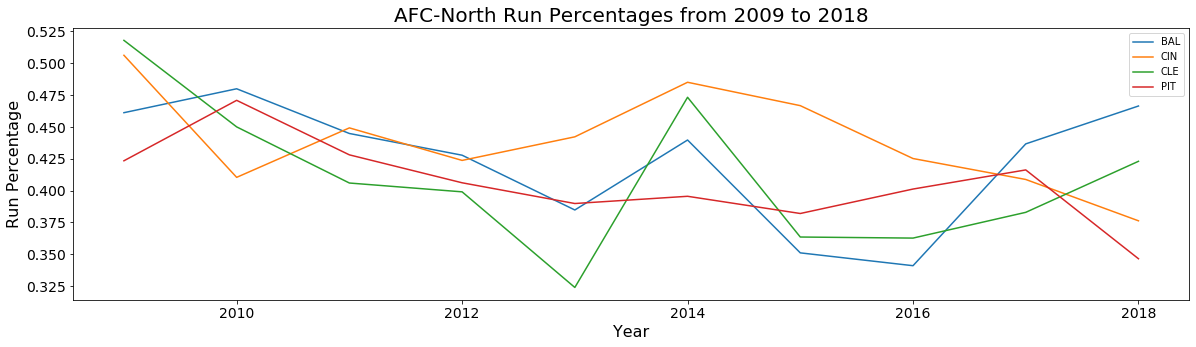

In [8]:
team_run_percentage_by_conference(df,'AFC-North')

Cleveland seems to have made a dramatic change from 2013 to 2014, and Cincinatti seems to be consistently running less over the past 4 years.

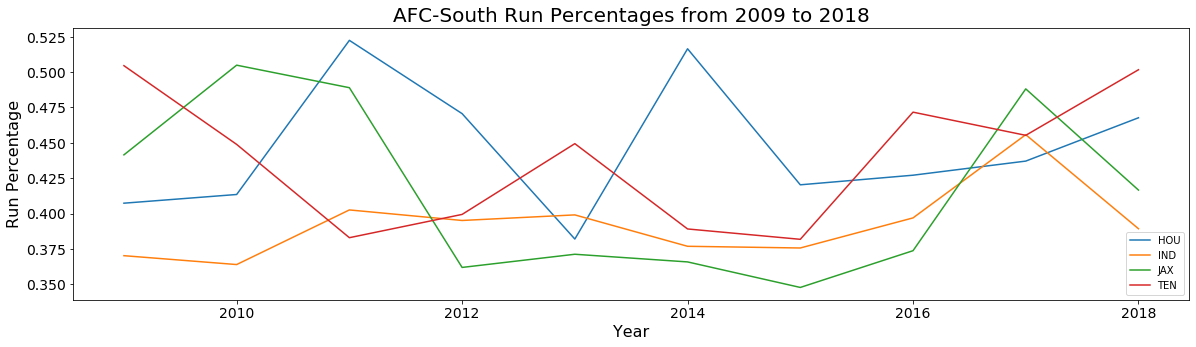

In [9]:
team_run_percentage_by_conference(df,'AFC-South')

Jacksonvile saw a dramatic decrease in run plays in 2012 that didn't recover until 2017 which coincides with drafting Leonard Fournette. Indianapolis seems to favor pass plays more than the average team.

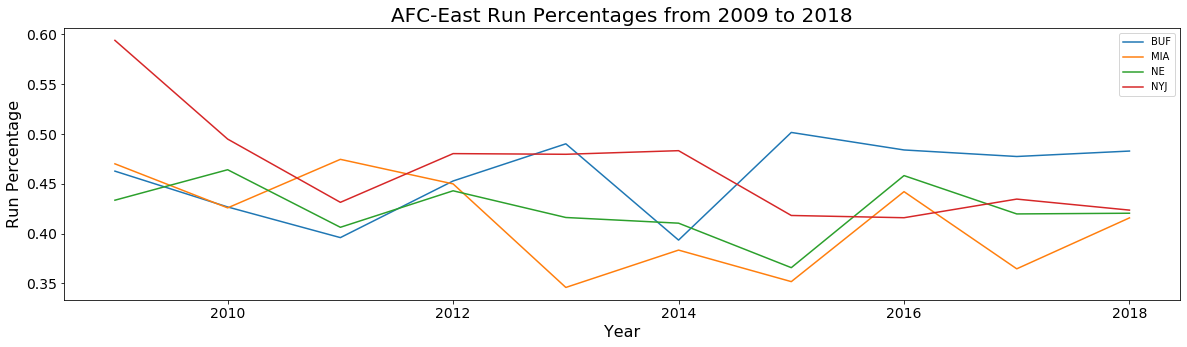

In [10]:
team_run_percentage_by_conference(df,'AFC-East')

The NY Jets called run almost 60% of the time in 2009, but this quickly declined. This is probably why the NY Jets have the highest overall run percentage.

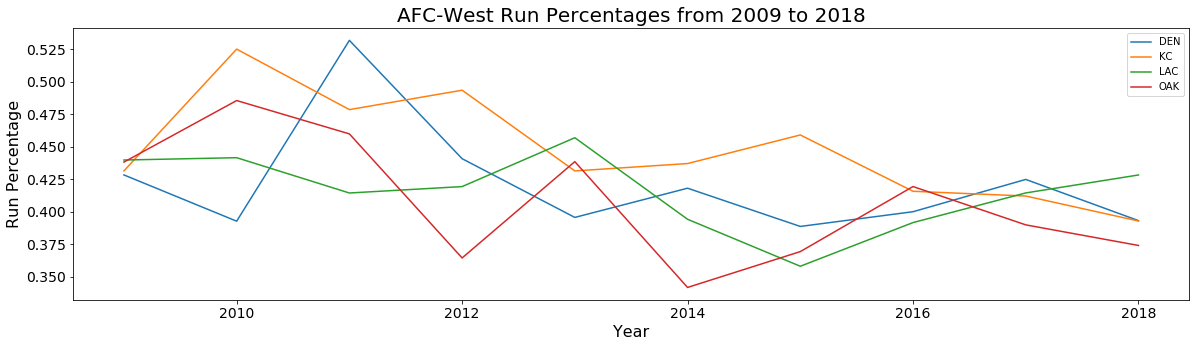

In [11]:
team_run_percentage_by_conference(df,'AFC-West')

Denver saw a big increase in run plays in 2011, and Kansas City seems to be consistently called less run plays over the past 10 years.

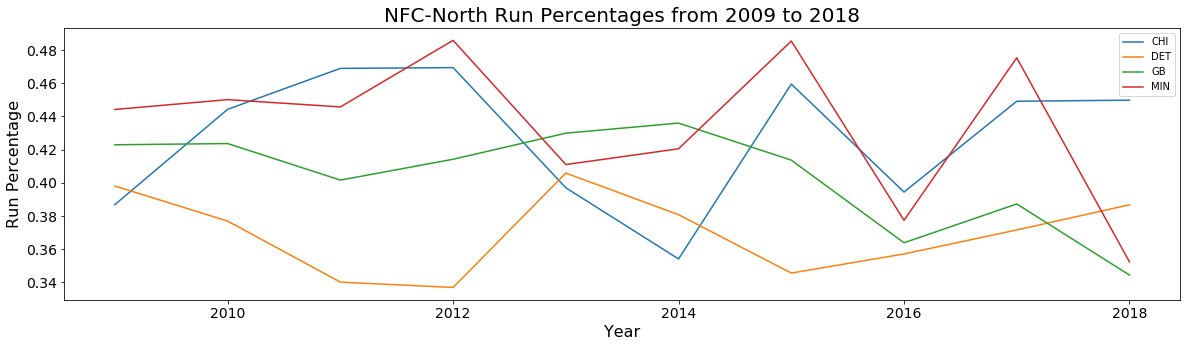

In [12]:
team_run_percentage_by_conference(df,'NFC-North')

Overall, the NFC North's max on the y axis is lower than the previous divisions. It seems to be a more pass-heavy division. 

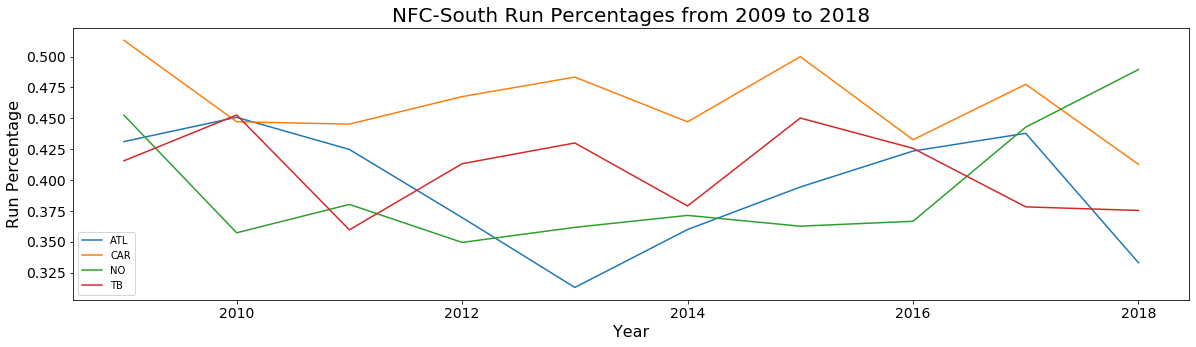

In [13]:
team_run_percentage_by_conference(df,'NFC-South')

New Orleans run game picked up with Alvin Kamara (drafted in 2017). Similarly, Atlanta's run game picked up significantly with Devonta Freeman (drafted in 2014).

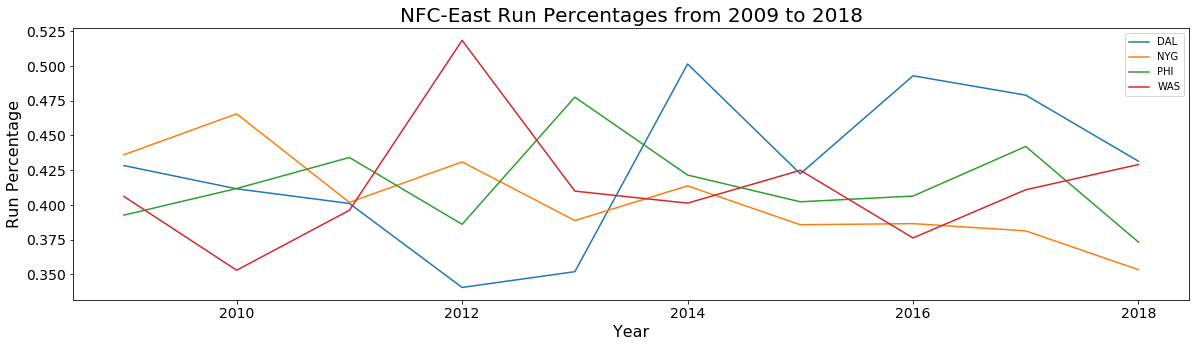

In [14]:
team_run_percentage_by_conference(df,'NFC-East')

The NY Giants have consistenly run the ball less over the past 10 years. Interestingly, drafting Ezekiel Elliot actually decreased the % of run plays called for the Cowboys (2016 draft).

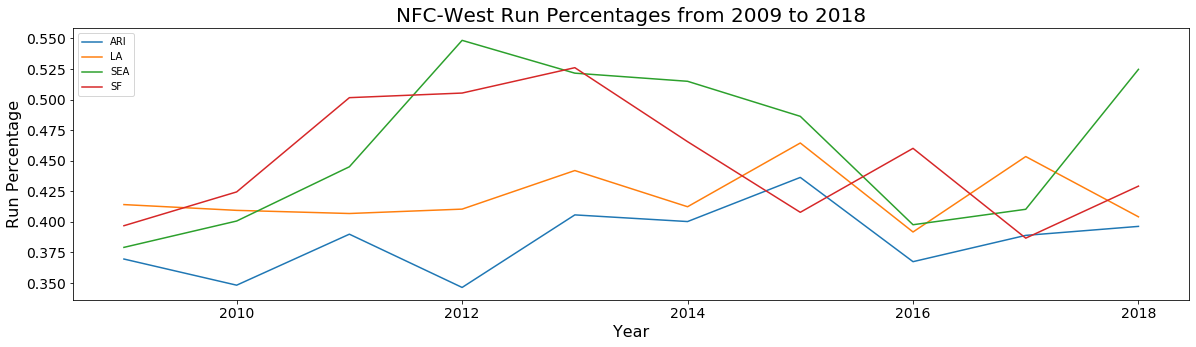

In [15]:
team_run_percentage_by_conference(df,'NFC-West')

Seattle seems to run the ball more than the average team which makes sense when you consider their dual-threat quarterback: Russell Wilson.

### Weekly Tendencies

In this section, I want to visualize how run call percentages and pass call percentages change over the course of the season.

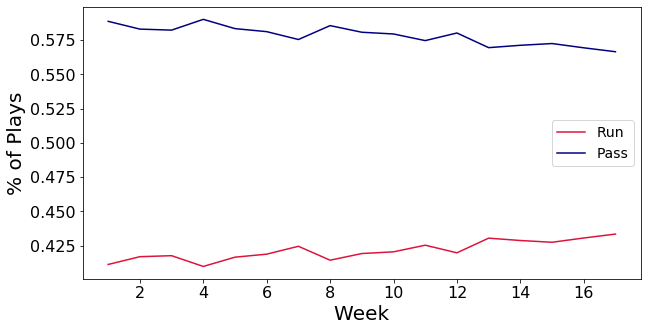

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('week')['effective_run'].mean(),color='crimson')
plt.plot(1-df.groupby('week')['effective_run'].mean(),color='navy')
plt.xlabel('Week',fontsize=20)
plt.ylabel('% of Plays',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(labels=['Run','Pass'],fontsize=14);

It seems like coaches get more conservative as the season approaches the end.

### Quarter Tendencies

In this section, I want to visualize how the quarter impacts play call.

In [17]:
bar_chart_by_qtr(df)

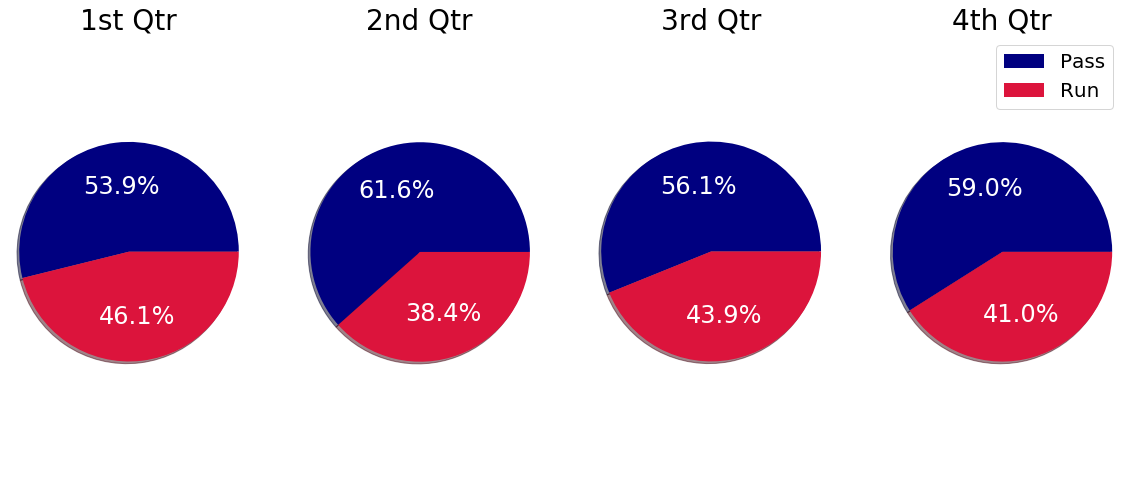

In [18]:
pie_chart_by_qtr(df)

Interestingly, pass plays are most common in the second quarter, but the fourth quarter is also higher than average. Coaches seem to be most conservative in the first quarter.

### Down Tendencies

In this section, I want to visualize how down impacts play call.

In [19]:
bar_chart_by_down(df)

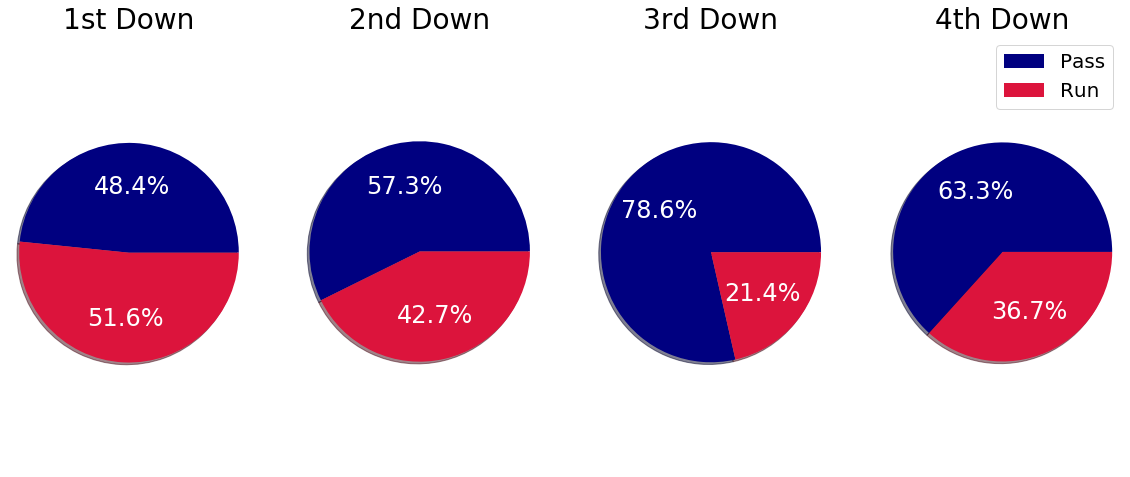

In [20]:
pie_chart_by_down(df)

3rd Down is overwhelmingly partial to pass plays whereas 1st down is the most "unpredictable" since it's really a toss up.

### Winning vs. Losing Tendencies

In this section, I aim to differentiate play call tendencies by score_differential. In other words, I will look at how winning vs. not winning teams call plays. Then I will look at how winning teams vs. tied teams vs. losing teams call plays.

In [21]:
df['posteam_winning'] = df['score_differential'].apply(lambda x: 1 if x>0 else 0)

In [22]:
df.groupby('posteam_winning')[['effective_run','effective_pass']].mean()

effective_run  effective_pass
posteam_winning                               
0                     0.372621        0.627379
1                     0.511281        0.488719

In [23]:
df.groupby(['qtr','posteam_winning'])[['effective_run','effective_pass']].mean()

effective_run  effective_pass
qtr posteam_winning                               
1.0 0                     0.460653        0.539347
    1                     0.465049        0.534951
2.0 0                     0.371716        0.628284
    1                     0.403859        0.596141
3.0 0                     0.406367        0.593633
    1                     0.480596        0.519404
4.0 0                     0.246444        0.753556
    1                     0.658717        0.341283

Winning teams call run about 2/3 of the time in the 4th quarter vs only 40% of the time in the second quarter. Now let's differentiate even more by distinguishing between winning, losing, and tied.

In [24]:
criteria = [df['score_differential'].between(-100,-1), df['score_differential'].between(0,0), 
            df['score_differential'].between(1, 100)]
values = ['Losing', 'Tied', 'Winning']
df['posteam_status'] = np.select(criteria, values, 0)

In [25]:
df.groupby(['qtr','posteam_status'])[['effective_run','effective_pass']].mean()

effective_run  effective_pass
qtr posteam_status                               
1.0 Losing               0.452616        0.547384
    Tied                 0.465279        0.534721
    Winning              0.465049        0.534951
2.0 Losing               0.362914        0.637086
    Tied                 0.405205        0.594795
    Winning              0.403859        0.596141
3.0 Losing               0.399671        0.600329
    Tied                 0.463303        0.536697
    Winning              0.480596        0.519404
4.0 Losing               0.232039        0.767961
    Tied                 0.413090        0.586910
    Winning              0.658717        0.341283

Tied teams are much more balanced in play calls in the 4th quarter versus winning or losing teams.

### Minute Tendencies

In this section, I want to break down play calls by minute of the game. Then I will visualize how play calling differs among winning teams, losing teams, and tied teams as time goes on.

In [26]:
r = range(1,61)
l = [*r]
l.reverse()
minute_dict = {}
start = 0
end = 60
for i in l:
    minute_dict[range(start,end)] = i
    start = end
    end += 60
    
df['minutes_elapsed'] = df['game_seconds_remaining'].apply(lambda x: next((
    v for k, v in minute_dict.items() if x in k), 0))

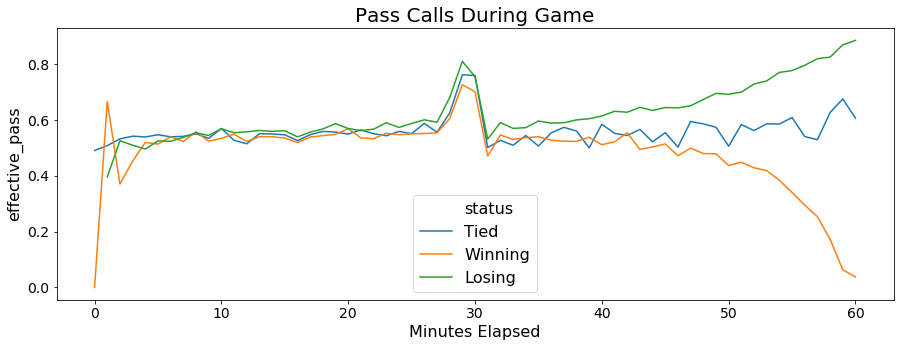

In [27]:
line_plot(df,play='effective_pass',title='Pass Calls During Game')

The first minute observations are most likely games where scores occurred very quickly. The most important takeaway is that winning teams call less run plays as time goes on, especially in the last 10 minutes of a game.

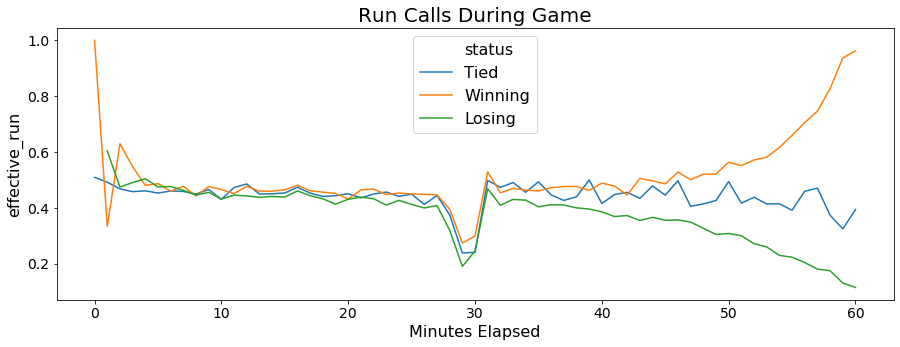

In [28]:
line_plot(df,play='effective_run',title='Run Calls During Game')

Similarly, run calls decrease significantly for losing teams and even decrease for tied teams in the last 10 minutes of a game.

Finally, let's save the csv back to S3.

In [29]:
fs = s3fs.S3FileSystem(anon=False,key='AWS KEY',secret='AWS SECRET KEY')

bucket = 'nfl-play-by-play-capstone'

with fs.open(f'{bucket}/nfl_play_by_play_with_weather_post_eda.csv','w') as f:
    df.to_csv(f)